### Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm  # color map 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

### Gather Data
[Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [2]:
b_data = load_boston()

In [3]:
type(b_data)

sklearn.utils.Bunch

## Explore what's inside dataset

In [4]:
dir(b_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print( b_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
type(b_data.data)

numpy.ndarray

In [7]:
b_data.data.shape

(506, 13)

In [8]:
b_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in $000
b_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas

In [10]:
#create a dataframe with provided components
data = pd.DataFrame(data = b_data.data, columns= b_data.feature_names)

# add price column
data['PRICE'] = b_data.target

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [14]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## cleaning data - check for missing values

In [15]:
pd.isnull(data).any()  # check if there are any missing values in any column

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data visualisation

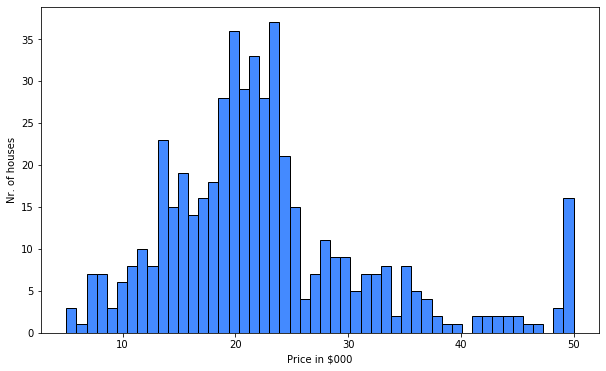

In [17]:
# create a hisogram for house prices
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#448AFF')
plt.xlabel('Price in $000')
plt.ylabel('Nr. of houses')
plt.show()

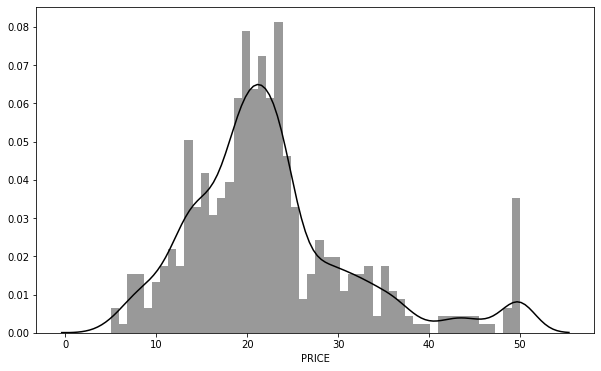

In [18]:
# create same histogram with seaborn liberary
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, color='black', hist=True, kde=True)
plt.show()

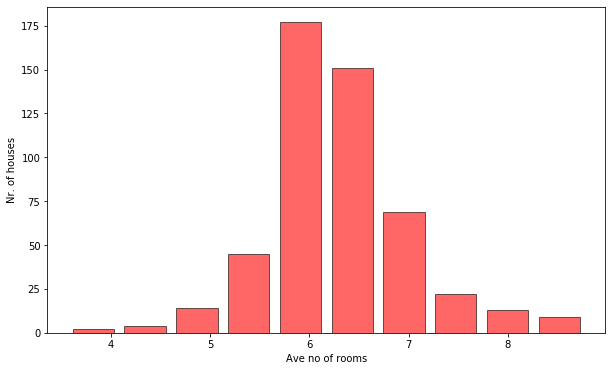

6.284634387351787

In [19]:
# create a hisogram for "no of rooms"
plt.figure(figsize=(10,6))
plt.hist(data['RM'],  color='red', ec='black', alpha=0.6, rwidth=0.8 )
plt.xlabel('Ave no of rooms')
plt.ylabel('Nr. of houses')
plt.show()

data['RM'].mean()

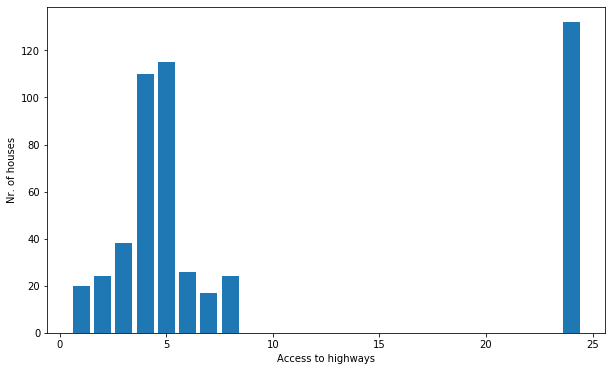

In [20]:
# create a hisogram for "RAD" descrete data
frequency = data['RAD'].value_counts()
# print( frequency.index)
# frequency.axes[0]

plt.figure(figsize=(10,6))
plt.xlabel('Access to highways')
plt.ylabel('Nr. of houses')
plt.bar(frequency.index, height= frequency)
plt.show()

In [21]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive statistics

In [22]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [23]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [24]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [25]:
data.corr()  # Pearson correlation coefficients(Assumption is we're using continuous data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]= True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

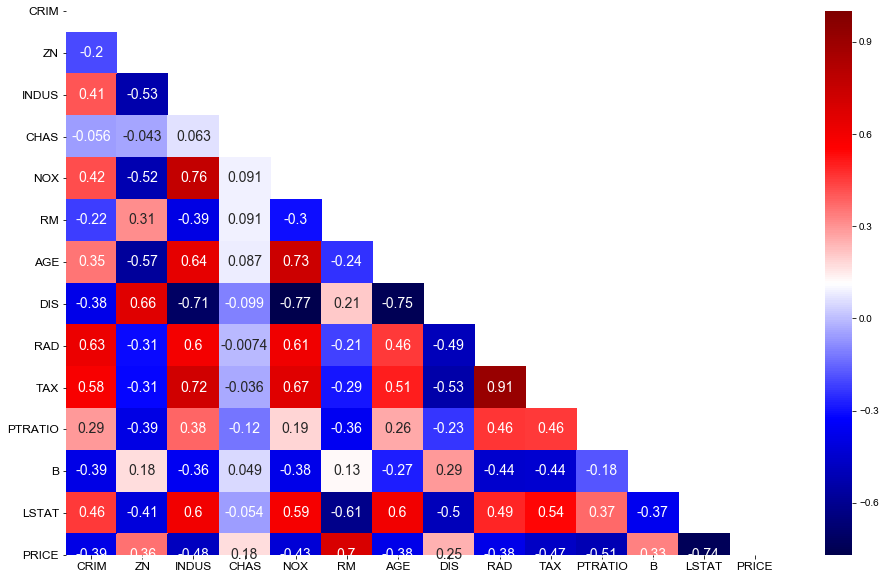

In [27]:
plt.figure(figsize= (16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={"size":14}, cmap=cm.seismic)
sns.set_style('whitegrid')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

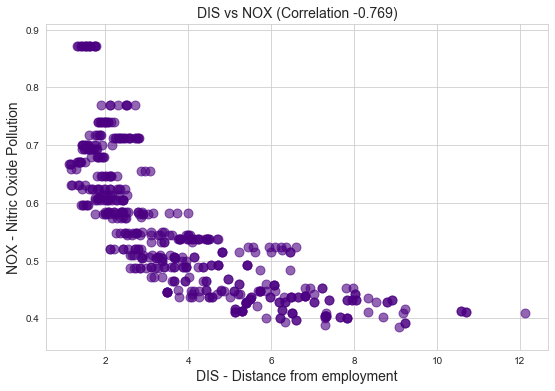

In [28]:
# graph the relationship between DIS and NOX with matplotlib
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'],y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment' , fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution' , fontsize=14)

plt.show()

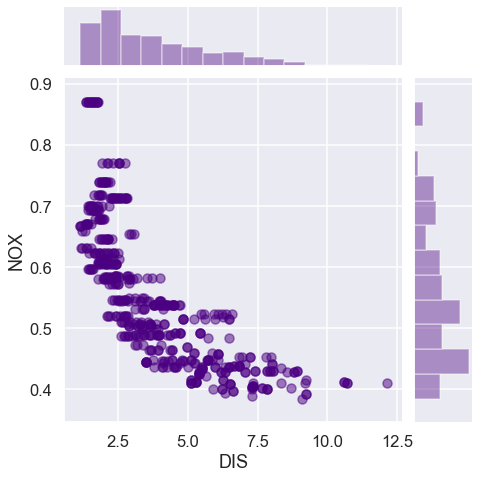

In [29]:
# Draw a scatter plot with seaborn
sns.set()  # reset sns styling to default
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color= 'indigo', joint_kws={'alpha':0.5})
plt.show()

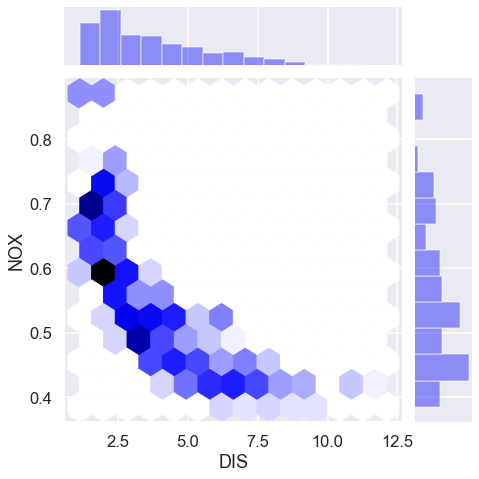

In [30]:
# Draw a scatter plot with seaborn - alternative visualization
sns.set()  # reset sns styling to default
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex' , height=7, color= 'blue')
plt.show()

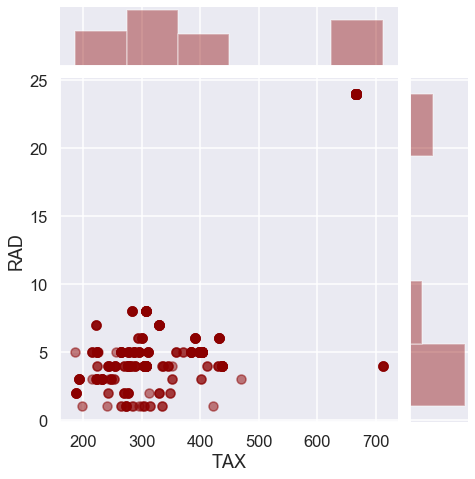

In [31]:
# Draw a scatter plot with seaborn
sns.set()  # reset sns styling to default
sns.set_context('talk')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color= 'darkred', joint_kws={'alpha':0.5})
plt.show()

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


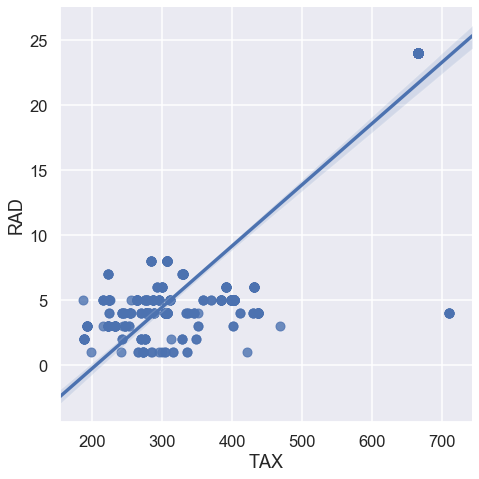

In [32]:
# draw a scatter plot with linear regression line
sns.lmplot(x='TAX', y='RAD', data= data, size=7)
plt.show()

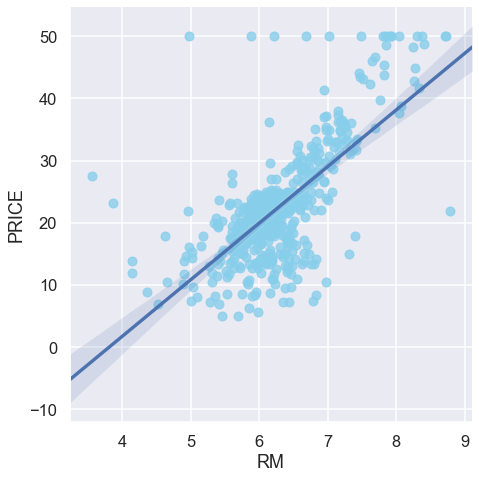

In [33]:
# draw a scatter plot no of rooms vs price
sns.lmplot(x='RM', y='PRICE', data= data, size=7, scatter_kws={'color':'skyblue'})
plt.show()

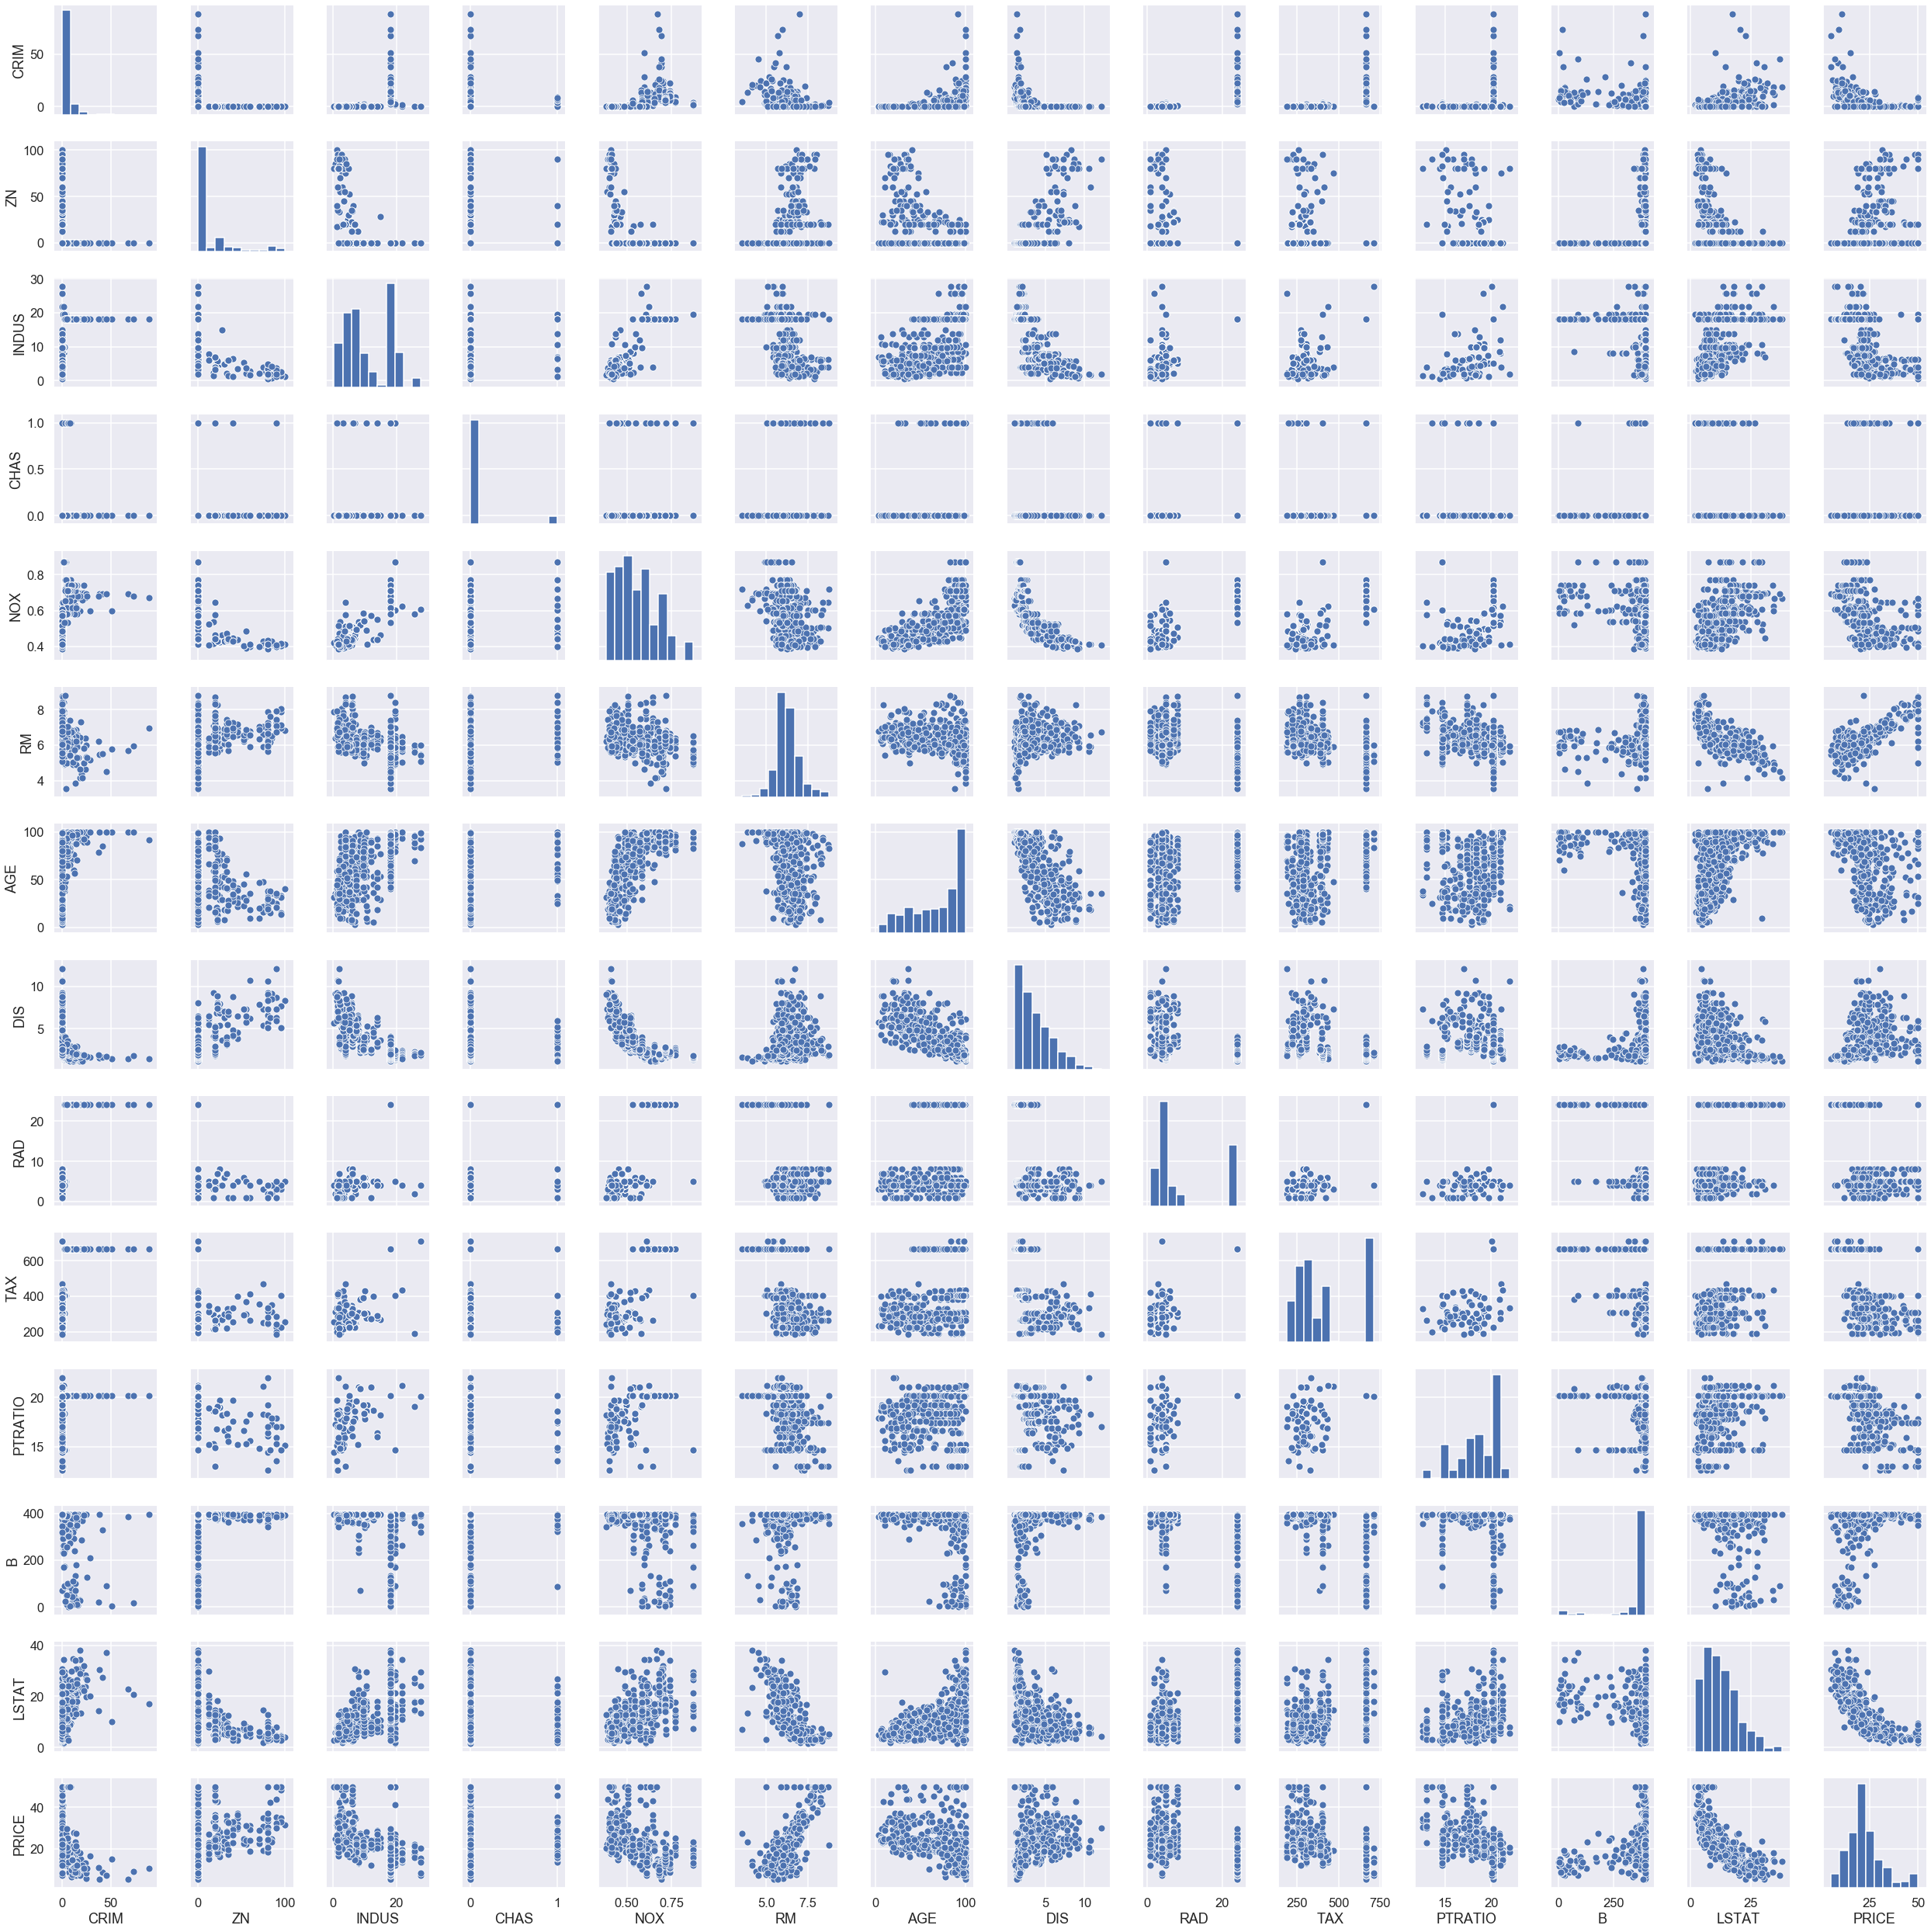

Wall time: 36.4 s


In [34]:
%%time

sns.pairplot(data)
plt.show()

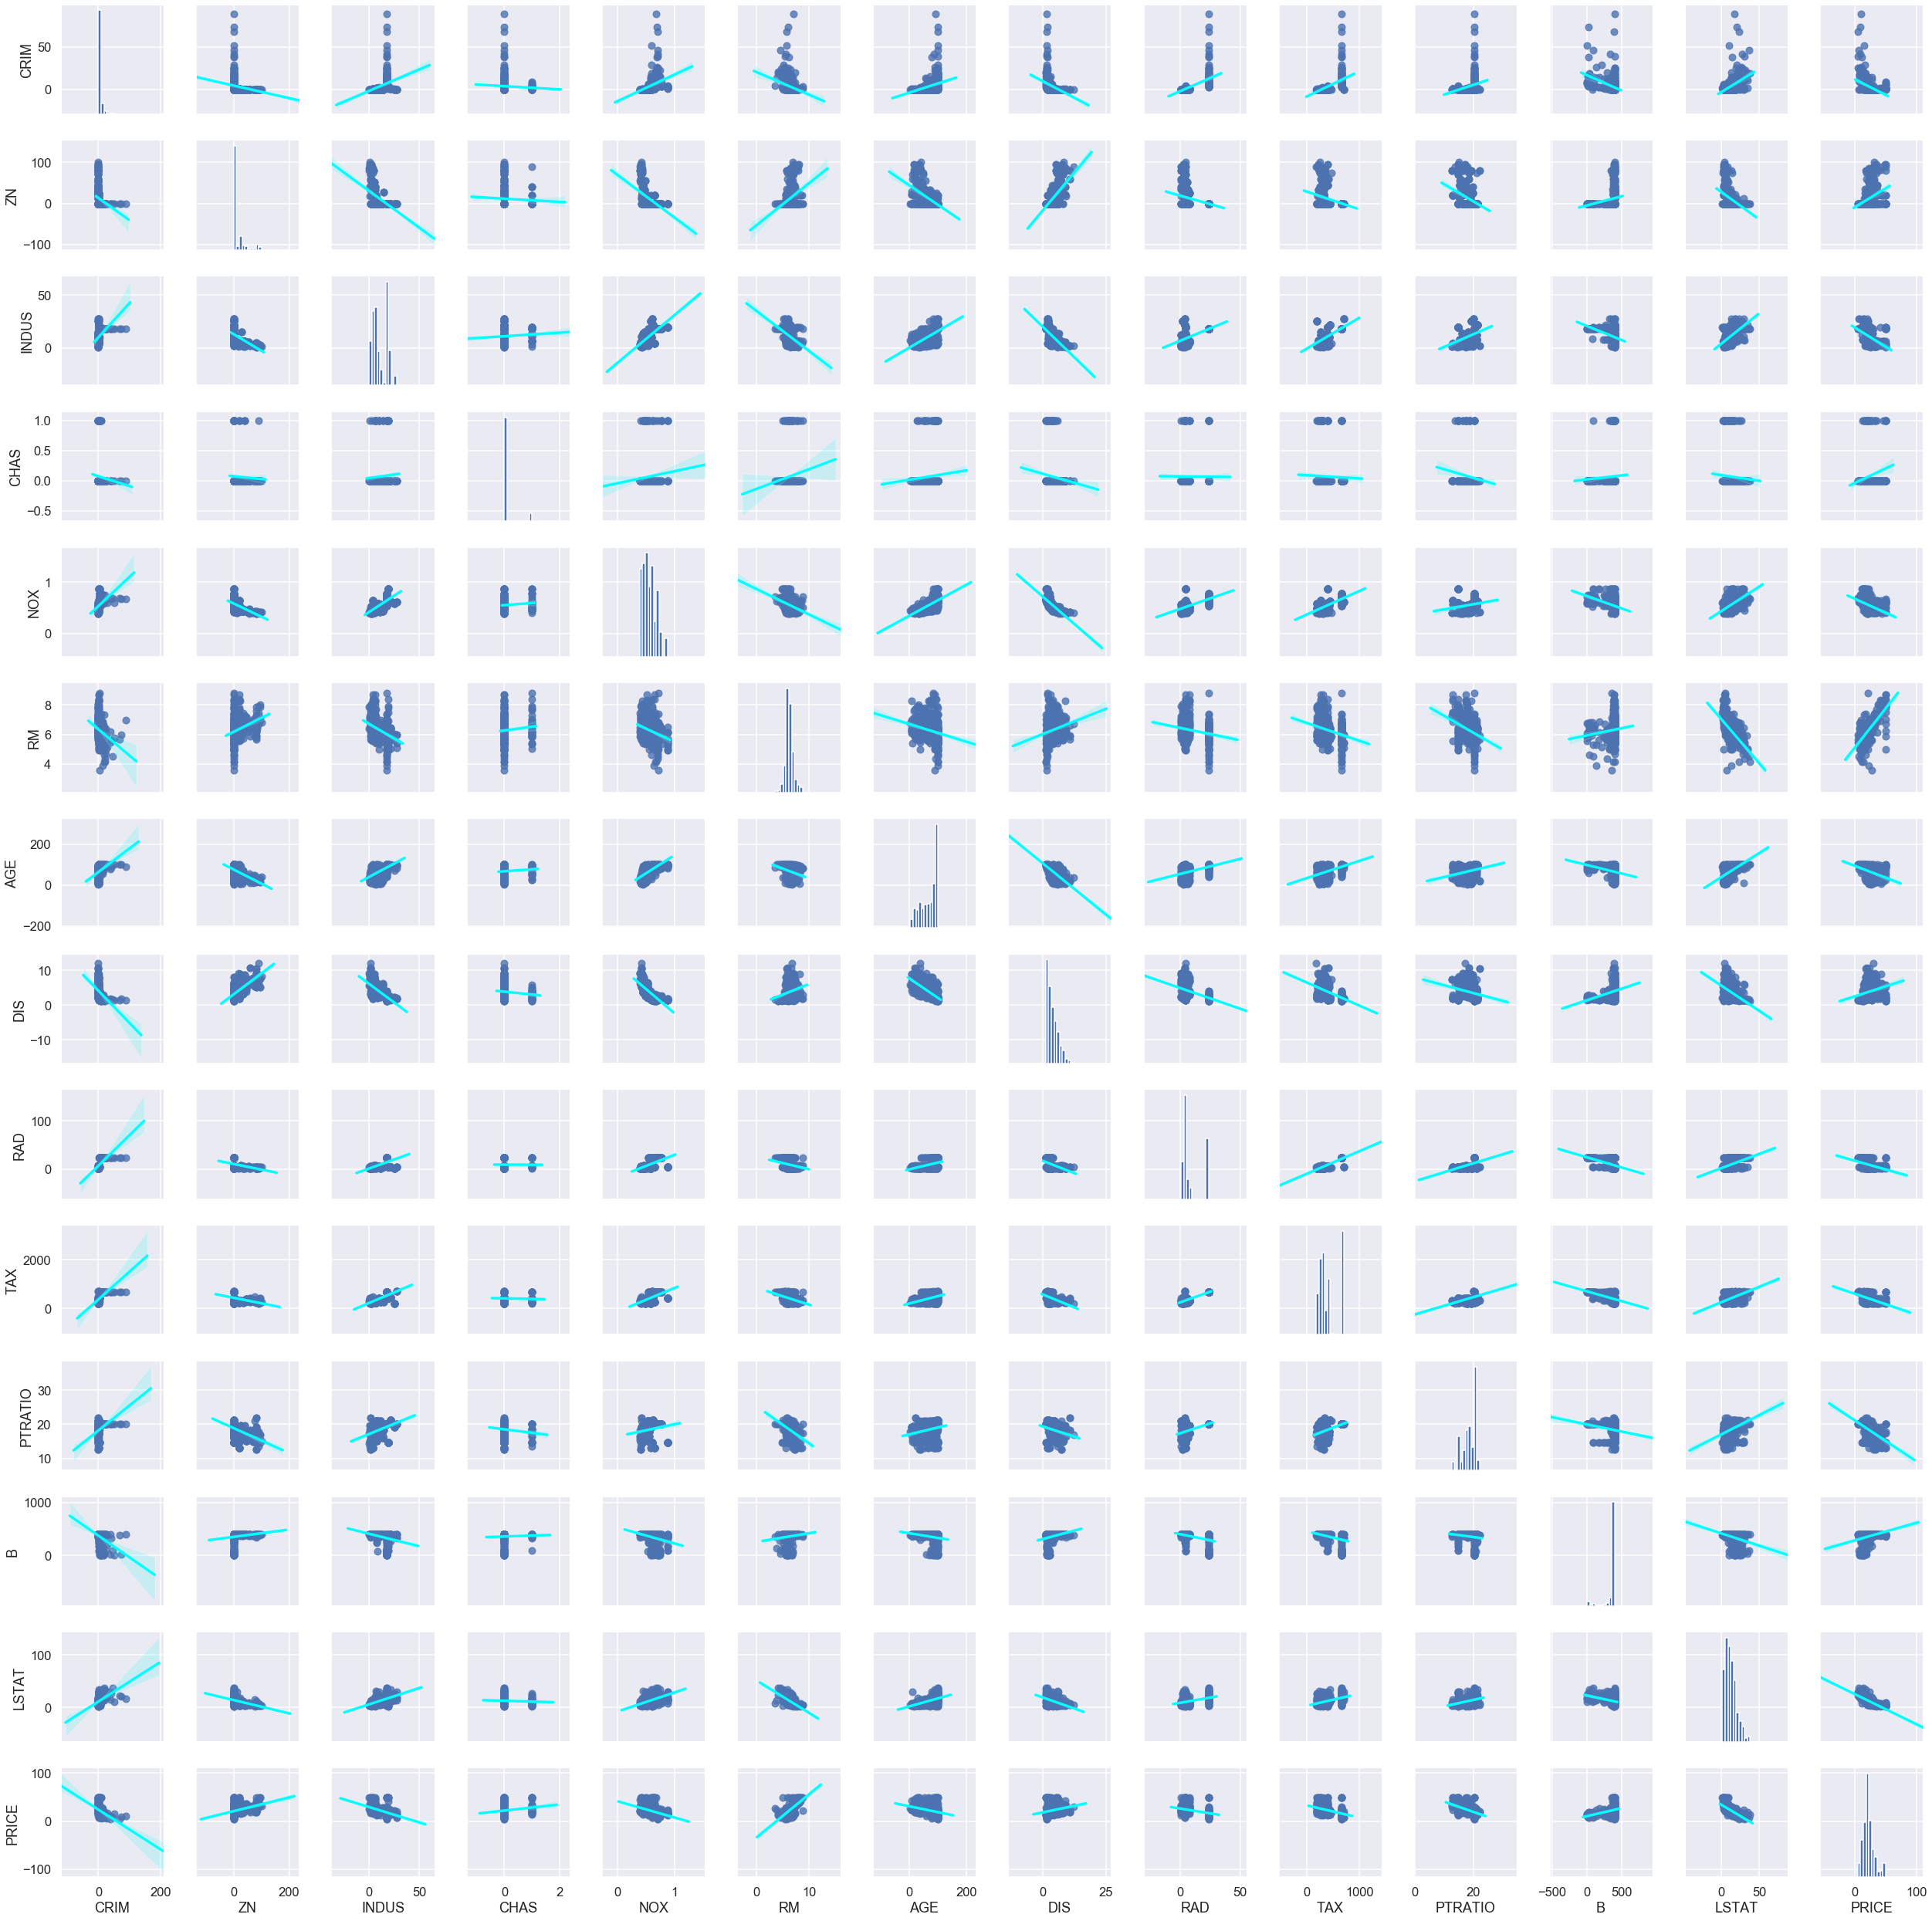

Wall time: 55.4 s


In [35]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training and test Dataset Split 

In [36]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

## Multivariable Regression

In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_,index = X_train.columns , columns=['Coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
intercept 36.53305138282439


,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [38]:
# measuring the skew observed in PRICE histogram
data['PRICE'].skew()

1.1080984082549072

In [39]:
# performing a log transformation to reduce the skew in PRICE
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [40]:
y_log.skew()

# plt.hist(y_log, bins=20)
plt.show()

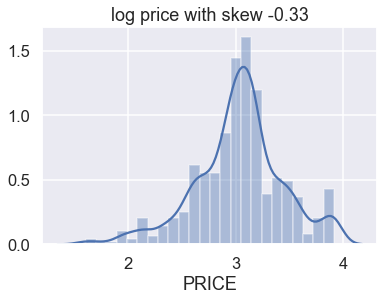

In [41]:
sns.distplot(y_log)
plt.title(f'log price with skew {round(y_log.skew(), 3)}')
plt.show()

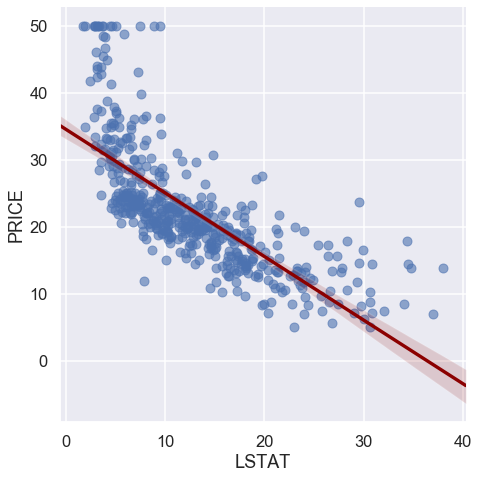

In [42]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

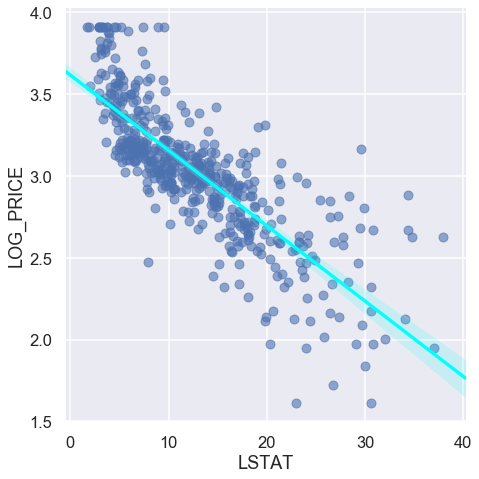

In [43]:
transformed_data = features
transformed_data['LOG_PRICE']=y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

## Redoing Multivariable Regression with log transform

In [44]:
prices = np.log(data['PRICE'])  # using log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('intercept', regr.intercept_)
coef = pd.DataFrame(data= regr.coef_,index = X_train.columns , columns=['Coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
intercept 4.05994387177519


In [45]:
# taking the ln (e^x) for the log_price to get the prices in $000
np.e**coef

,Coef
CRIM,0.989385
ZN,1.001581
INDUS,1.002032
CHAS,1.083645
NOX,0.494569
RM,1.076166
AGE,1.000764
DIS,0.953483
RAD,1.014672
TAX,0.999355


## p values & Evaluating Coefficients

In [46]:
X_incl_constant = sm.add_constant(X_train)
model=sm.OLS(y_train, X_incl_constant)
results= model.fit()

pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicolinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ....+ \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac {1}{(1 - R _{TAX} ^2)} $$

VIF = Variance Infilation Factor

*Ideally should be less than 10 - to indicate the absence of multicolinearity*

In [47]:
variance_inflation_factor(exog=X_incl_constant.values, exog_idx=1)



1.7145250443932485

In [48]:
vif = []
for i in range(X_incl_constant.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_constant.values, exog_idx=i))
pd.DataFrame({'coef_name': X_incl_constant.columns, 'vif': np.around(vif, 3)})

,coef_name,vif
0,const,597.549
1,CRIM,1.715
2,ZN,2.333
3,INDUS,3.943
4,CHAS,1.079
5,NOX,4.410
6,RM,1.840
7,AGE,3.327
8,DIS,4.223
9,RAD,7.314


## Model Simplification & the BIC "Baisian Information Criterion"

*BIC is the number to show the model complexity - compare the BIC between mutiple models and use the lower value*

In [49]:
# Original model with log prices and all features

X_incl_constant = sm.add_constant(X_train)
model=sm.OLS(y_train, X_incl_constant)
results= model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print ('BIC is' ,round(results.bic, 3))
print ('r-squared' ,round(results.rsquared, 3))


BIC is -139.75
r-squared 0.793


In [50]:
# Reduced model #1 excluding INDUS

X_incl_constant = sm.add_constant(X_train)
X_incl_constant =  X_incl_constant.drop(['INDUS'], axis=1)

model=sm.OLS(y_train, X_incl_constant)
results= model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print ('BIC is' ,round(results.bic, 3))
print ('r-squared' ,round(results.rsquared, 3))

BIC is -145.145
r-squared 0.793


In [51]:
# Reduced model #2 excluding INDUS & AGE

X_incl_constant = sm.add_constant(X_train)
X_incl_constant =  X_incl_constant.drop(['INDUS','AGE'], axis=1)

model=sm.OLS(y_train, X_incl_constant)
results= model.fit()

coef_minus_indus_age = pd.DataFrame({'coef': results.params, 'p-value':round(results.pvalues, 3)})

print ('BIC is' ,round(results.bic, 3))
print ('r-squared' ,round(results.rsquared, 3))

BIC is -149.499
r-squared 0.792


In [52]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age ]
pd.concat(frames, axis=1)

C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,p-value,coef,p-value,coef,p-value
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals and Residual Plots

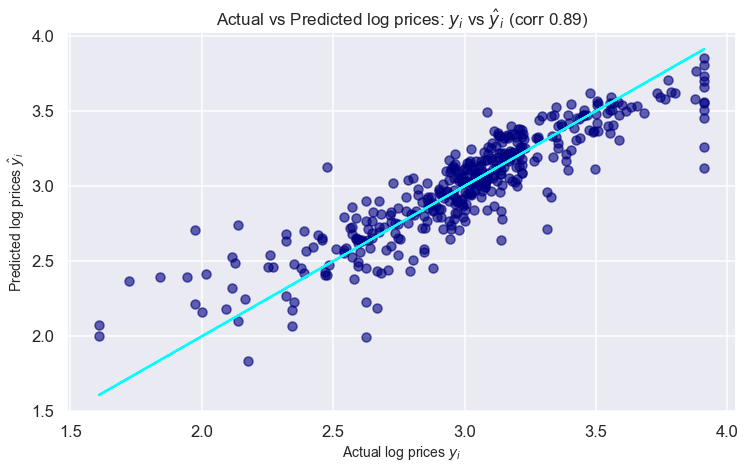

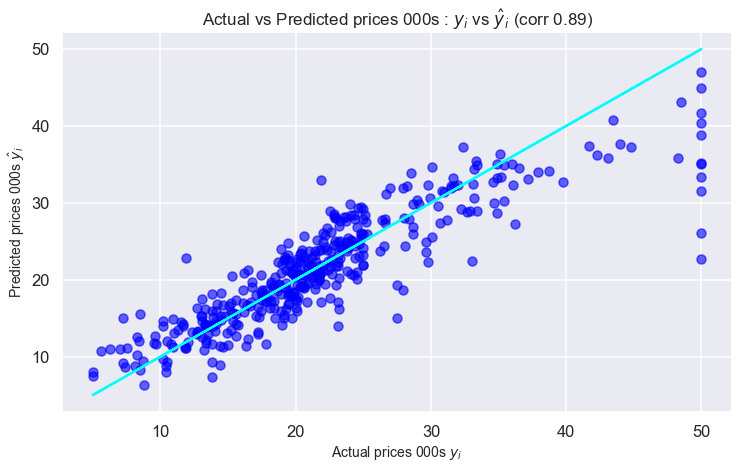

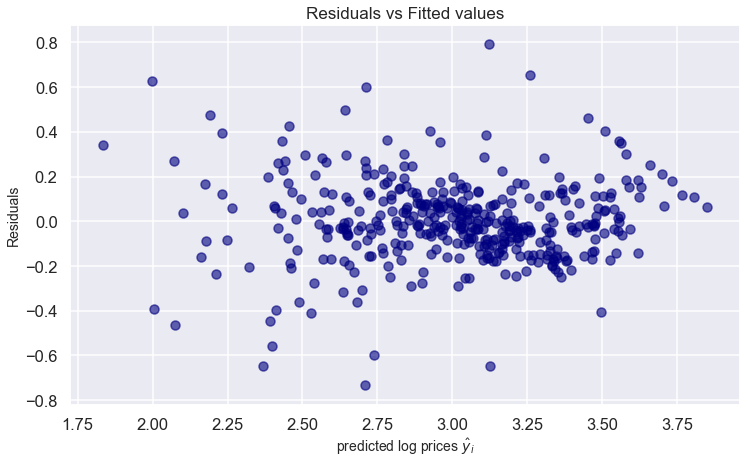

In [55]:
# modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE'])  # using log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# Using statsmodel
X_incl_constant = sm.add_constant(X_train)
model=sm.OLS(y_train, X_incl_constant)
results= model.fit()

# Residuals
results.resid

# Graph of Actual vs. Predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)

plt.figure(figsize=(12,7))
plt.scatter(x= y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (corr {corr})', fontsize=17)

plt.show()

plt.figure(figsize=(12,7))
plt.scatter(x= np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices 000s : $y _i$ vs $\hat y _i$ (corr {corr})', fontsize=17)

plt.show()

# residuals vs predicted values
plt.figure(figsize=(12,7))
plt.scatter(x= results.fittedvalues, y= results.resid, c='navy', alpha=0.6)

plt.xlabel('predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=17)


# Mean Squared Error & R-squared
Reduced_log_mse = round(results.mse_resid, 3)
Reduced_log_rsquared = round(results.rsquared, 3)


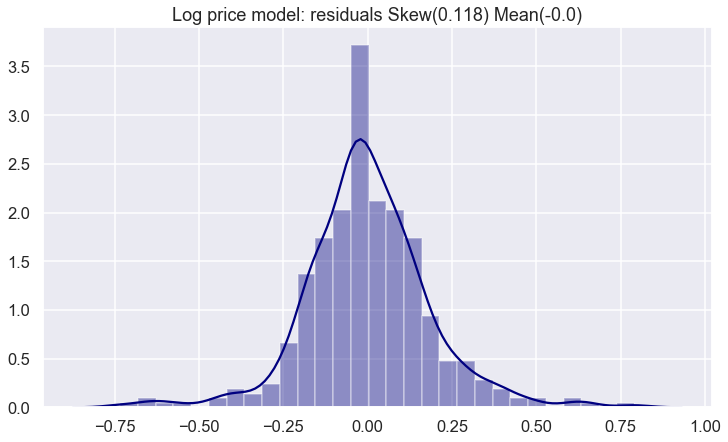

In [56]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(), 3)

plt.figure(figsize=(12,7))
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew({resid_skew}) Mean({resid_mean})')
plt.show()